In [1]:
## This code toggles all code cells displaying on or off, so we can see output and markdown cells only.
## All code cells display can be toggled on/off.

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
## Import all the things

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycountry

%matplotlib inline 

# The Carpentries: Programmatic Assessment Report
## 2017 Year End and 2018 Q1
#### Authors: Maneesha Sane, Erin Becker

## Part 1: Workshops over time

### Workshops by Carpentry by Year

We began systematically recording data for our workshops in 2012. We can use this data to investigate how have The Carpentries have grown over the years in terms of number of workshops per year and how Data Carpentry has grown in comparison with Software Carpentry. For these analyses, we will consider only Software Carpentry and Data Carpentry workshops held between January 1st, 2012 and March 31st, 2018. Instructor Training events are analyzed in a later portion of this report.

For each of our workshops, we collected the following data:

| variable | definition |
| -------- | ----------- | 
| slug | Unique identifier for each workshop. Takes the form `YYYY-MM-DD-sitename`. |
| start | Start date of the workshop. Takes the form `YYYY-MM-DD`. |
| attendance | Number of learners at the workshop. | 
| host_name | Institution that hosted the workshop. | 
| country | The two-letter country code for the country in which the workshop was held. |
| workshop_type | Whether this is a Software Carpentry (SWC) or Data Carpentry (DC) workshop. | 

In [3]:
# Load csv into df
workshops = pd.read_csv("data_files/workshops.csv")


# Translate country codes to country names
def get_country_name(alpha_code):
    try:
        return pycountry.countries.get(alpha_2=alpha_code).name
    except KeyError:
        return "online"

workshops['country'] = workshops['country'].apply(get_country_name)


# Clean up the tag names
workshops.loc[workshops['tag_name'].str.contains("SWC"), "workshop_type"] = "SWC"
workshops.loc[workshops['tag_name'].str.contains("DC"), "workshop_type"] = "DC"
workshops.loc[workshops['tag_name'].str.contains("LC"), "workshop_type"] = "LC"
workshops.loc[workshops['tag_name'].str.contains("TTT"), "workshop_type"] = "TTT"

workshops = workshops.drop('tag_name', axis=1)

# Clean up attendance value - this is inconsistently stored as NaN or 0
# All zero values should be NaN
workshops['attendance'] =  workshops['attendance'].replace(0.0, np.nan)

# Remove online events like maintainer onboarding 
workshops = workshops.drop(workshops[workshops.country == "online"].index)

# Date data type
workshops['start_date'] = pd.to_datetime(workshops['start_date'])

# Remove instructor training events; these will be analyzed separately.

# Limit to non TTT workshops
workshops_nonTTT = workshops[workshops['workshop_type'] != "TTT"]

workshops_nonTTT
# Note: to preview the data table, remove the semi-colon (;) from the end of the line above

,slug,start_date,attendance,host_name,country,workshop_type
0,2012-01-18-stsci,2012-01-18,14.0,Space Telescope Science Institute,United States,SWC
1,2012-02-20-itcp,2012-02-20,50.0,International Centre for Theoretical Physics,Italy,SWC
2,2012-02-23-toronto,2012-02-23,28.0,University of Toronto,Canada,SWC
3,2012-03-07-indiana,2012-03-07,39.0,Indiana University,United States,SWC
4,2012-03-26-mbari,2012-03-26,38.0,Monterey Bay Aquarium Research Institute,United States,SWC
5,2012-03-28-nersc,2012-03-28,35.0,NERSC,United States,SWC
6,2012-04-02-chicago,2012-04-02,35.0,University of Chicago,United States,SWC
7,2012-04-14-utahstate,2012-04-14,32.0,Utah State University,United States,SWC
8,2012-04-30-ucl,2012-04-30,44.0,University College London,United Kingdom,SWC
9,2012-05-07-michiganstate,2012-05-07,55.0,Michigan State University,United States,SWC


### The Carpentries workshops by year.
The table and chart below show the total number of Data Carpentry and Software Carpentry workshops held each year, including a projection for 2018 based on actual 2017 Q1 data relative to 2017 full year data.


#### Table 1. The Carpentries workshops by year.

In [4]:
# All workshops 2012 through 2017

workshops_by_carpentry_year_through_2017 = workshops_nonTTT[workshops_nonTTT['start_date'].dt.year<=2017]
workshops_by_carpentry_year_through_2017 = workshops_by_carpentry_year_through_2017.groupby([workshops_by_carpentry_year_through_2017['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()
workshops_by_carpentry_year_through_2017['total'] = workshops_by_carpentry_year_through_2017.sum(axis=1)


# All workshops in 2017 full year and 2017 Q1
workshops_by_carpentry_year_2017 = workshops_nonTTT[workshops_nonTTT['start_date'].dt.year == 2017]
workshops_by_carpentry_year_2017Q1 = workshops_by_carpentry_year_2017[workshops_by_carpentry_year_2017['start_date'].dt.month <= 3]                                              
workshops_by_carpentry_year_2017Q1 = workshops_by_carpentry_year_2017Q1.groupby([workshops_by_carpentry_year_2017Q1['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()
workshops_by_carpentry_year_2017 = workshops_by_carpentry_year_2017.groupby([workshops_by_carpentry_year_2017['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()

# All workshops in 2018 Q1
workshops_by_carpentry_year_2018Q1 = workshops_nonTTT[workshops_nonTTT['start_date'].dt.year == 2018]
workshops_by_carpentry_year_2018Q1 = workshops_by_carpentry_year_2018Q1.groupby([workshops_by_carpentry_year_2018Q1['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()

# Proportion of 2017 workshops that took place in 2017 Q1
proportion = workshops_by_carpentry_year_2017Q1/workshops_by_carpentry_year_2017
proportion = workshops_by_carpentry_year_2017Q1/workshops_by_carpentry_year_2017
proportion = proportion.rename(index={2017:2018})

# Use proportion to calculate 2018 projections
workshops_by_carpentry_year_2018Q1_projected = workshops_by_carpentry_year_2018Q1 / proportion
workshops_by_carpentry_year_2018Q1_projected = workshops_by_carpentry_year_2018Q1_projected.astype(int)
workshops_by_carpentry_year_2018Q1_projected['total'] = workshops_by_carpentry_year_2018Q1_projected.sum(axis=1)


# Combine real data through 2017 and projected 2018 data in to one dataframe
workshops_by_carpentry_year_with_projections = pd.concat([workshops_by_carpentry_year_through_2017, workshops_by_carpentry_year_2018Q1_projected], axis=0)

# Fill na with zeros and make floats in to ints
workshops_by_carpentry_year_with_projections = workshops_by_carpentry_year_with_projections.fillna(0)
workshops_by_carpentry_year_with_projections = workshops_by_carpentry_year_with_projections.astype(int)

# Rename 2018 to projected
workshops_by_carpentry_year_with_projections.rename(index={2018: '2018 projected'}, inplace=True)



workshops_by_carpentry_year_with_projections.columns.names = ["Workshop Type"]
workshops_by_carpentry_year_with_projections.index.names = ["Year"]

workshops_by_carpentry_year_with_projections

Workshop Type,DC,SWC,total
Year,,,
2012,0,38,38
2013,0,93,93
2014,2,137,139
2015,31,243,274
2016,72,272,344
2017,81,256,337
2018 projected,130,294,424


#### Figure 1. The Carpentries workshops by year.

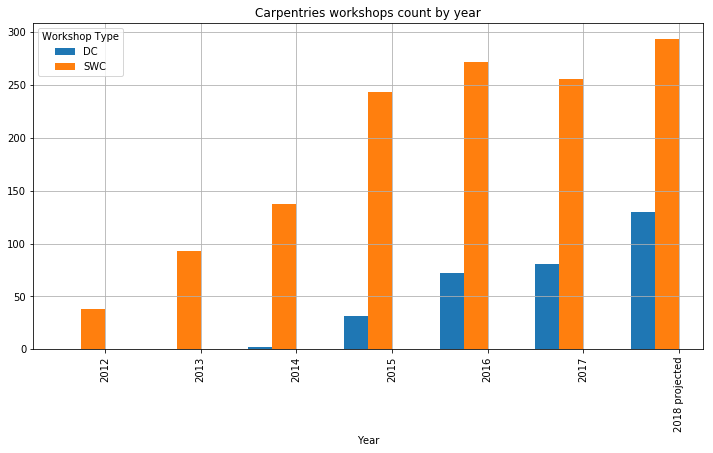

In [5]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Carpentries workshops count by year"
workshops_by_carpentry_year_with_projections.plot(y = ["DC", "SWC"], kind='bar', ax=ax, width=width, position=1, title=title)
ax.grid(True)

ax.set_xlabel("Year")


plt.show()

The number of Software Carpentry and Data Carpentry workshops appear to have remained roughly steady for the past several years, after a sharp jump from 2014 to 2015. The year 2015 was the first year in which The Carpentries had staff and a dedicated database to track workshop data, so some of this growth may instead reflect a growth in internal systems.

The data shown here may not account for unreported self-organized workshops. Although The Carpentries attempts to collect data on all workshops run under "The Carpentries" brand, sometimes institutions may run a workshop without reporting it back to The Carpentries staff. Thus, if there has been a shift from more centrally-organized to more self-organized workshops, this may cause an underestimate of our workshop growth. We are working to improve data collection to have more accurate reflections of our scope of work.

This may also reflect a shift to sites running a variation of Carpentries lessons, rather than official full Carpentries workshops.  While we've known anecdotally that this happens often, we have not systematically collected any data on when or how Carpentries lessons are used in other contexts.

### Workshops by Carpentry by Year and Country

The table and chart below show a count of the number of Carpentry workshops (SWC or DC) that took place in each country each year from 2012 through 2017. This data can help us to see geographic trends in our community and in particular, in which geographic regions The Carpentry community is growing.

Projections for 2018 are not included here as many countries do not have enough of a history for us to base projections on. Projections for countries with a longer history or more activity are shown below.

In many countries, we have seen a steady increase in the number of workshops run. In several countries though (Australia, New Zealand, Canada), we have seen a decline in the number of workshops run. This may be due to the reasons cited above, including unreported self-organized workshops or an increase in variations on Carpentries workshops.  In either case this is a motivation for The Carpentries to improve data collection and methods to understand our scope of work beyond our centrally coordinated workshops.

Decreases in the number of workshops run in some countries may also be accounted for by shifts in our instructor community.  Carpentries activity is sustained by our instructors. Some instructors may move to new geographies or to new career phases. Without a larger community in place, these geographies may not have had the capacity to sustain their activity.  This is a motivation for The Carpentries to build strong and sustainable communities, with systems that account for individual turnover.

#### Table 2. The Carpentries workshops by year and country.

The table below is a summary of all Carpentries workshops with the year and country they were held in.

In [6]:
workshops_by_country_year = workshops_nonTTT.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()
workshops_by_country_year = workshops_by_country_year.fillna(0)
workshops_by_country_year.rename(columns={2018: '2018Q1'}, inplace=True)
workshops_by_country_year['total'] = workshops_by_country_year.sum(axis=1)
workshops_by_country_year = workshops_by_country_year.astype(int)
workshops_by_country_year


start_date,2012,2013,2014,2015,2016,2017,2018Q1,total
country,,,,,,,,
Australia,0,6,10,32,41,33,6,128
Belgium,0,0,0,1,0,1,0,2
Botswana,0,0,0,0,0,1,0,1
Brazil,0,0,6,5,5,0,0,16
Canada,8,11,22,25,41,29,4,140
China,0,1,0,0,0,0,0,1
Colombia,0,0,0,0,1,0,0,1
Cyprus,0,0,1,0,0,0,0,1
Denmark,0,0,1,0,2,3,1,7


In [7]:
# Get all workshops for 2017
workshops_2017 = workshops_nonTTT[(workshops_nonTTT['start_date'].dt.year == 2017)]

# # Get all workshops for 2017 Q1
workshops_2017Q1 = workshops_nonTTT[(workshops_nonTTT['start_date'].dt.year == 2017) & (workshops_nonTTT['start_date'].dt.month <= 3)]

# # Get all workshops for 2018 Q1
workshops_2018Q1 = workshops_nonTTT[(workshops_nonTTT['start_date'].dt.year == 2018) & (workshops_nonTTT['start_date'].dt.month <= 3)]

# 2017 Q1 workshops by country
workshops_by_country_year_2017Q1 = workshops_2017Q1.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2017Q1.rename(columns={2017:'2017Q1'}, inplace=True)

# 2018 Q1 workshops by country
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)

# 2017 workshops by country
workshops_by_country_year_2017 = workshops_2017.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()

# Concatenated table, 2017 Q1 and 2018 Q1 workshops by country
workshops_by_country_year_1718Q1 = pd.concat([workshops_by_country_year_2017Q1, workshops_by_country_year_2018Q1, workshops_by_country_year_2017], axis=1)

# Add column to show what percent of 2017 workshops took place in 2017 Q1
workshops_by_country_year_1718Q1['prop2017Q1'] = workshops_by_country_year_1718Q1['2017Q1']/workshops_by_country_year_1718Q1[2017]

# Add column to show expected 2018 workshops, if rate is same as 2017
workshops_by_country_year_1718Q1['proj2018'] =  workshops_by_country_year_1718Q1['2018Q1']/workshops_by_country_year_1718Q1['prop2017Q1']

# Give df a better name
workshops_by_country_year_with_projections = workshops_by_country_year_1718Q1

# # Relying only on 2017 projections excludes countries that held a workshop in 2018 Q1 but not 2017 Q1
# # Adjust the 2018 projections to be the max of the 2018 projection or the 2018 Q1 actual
workshops_by_country_year_with_projections["adj_proj2018"] = workshops_by_country_year_with_projections[["proj2018", "2018Q1"]].max(axis=1)


# # Fill NA with 0 and cast floats as ints
workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.fillna(0)
workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.astype(int)


workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.reset_index()
workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.rename(columns={'index':'country'})

# Table used to calculate 2018 projections - uncomment next line to hide/show
# workshops_by_country_year_with_projections


In [8]:
# All countries that have held at least 10 workshops (lifetime)

workshops_by_country_year_many = workshops_by_country_year[workshops_by_country_year.total >= 10]
workshops_by_country_year_many = workshops_by_country_year_many.reset_index()
workshops_by_country_year_many = workshops_by_country_year_many.reset_index()

# Uncomment line below to show/hide table
# workshops_by_country_year_many

### Table 3. All countries having hosted at least 10 workshops from 2012 through 2018 (projected)

In [9]:
# Join table of countries with at least 10 workshops with 2018 projections

workshops_by_country_year_top = pd.merge(workshops_by_country_year_many, workshops_by_country_year_with_projections, on='country', how='left')
workshops_by_country_year_top = workshops_by_country_year_top[['country', 2012, 2013, 2014, 2015, 2016, '2017_x', 'adj_proj2018']]
workshops_by_country_year_top = workshops_by_country_year_top.rename(columns={'2017_x':2017, 'adj_proj2018':'proj2018'})

workshops_by_country_year_top = workshops_by_country_year_top.fillna(0)
workshops_by_country_year_top['proj2018'] = workshops_by_country_year_top['proj2018'].astype(int)
workshops_by_country_year_top



start_date,country,2012,2013,2014,2015,2016,2017,proj2018
0,Australia,0,6,10,32,41,33,22
1,Brazil,0,0,6,5,5,0,0
2,Canada,8,11,22,25,41,29,11
3,Germany,0,3,3,4,4,9,9
4,New Zealand,0,1,0,7,14,9,6
5,Norway,1,1,1,4,5,1,1
6,South Africa,0,1,1,5,6,11,22
7,Switzerland,0,0,2,4,5,2,1
8,United Kingdom,7,14,21,27,37,44,53
9,United States,20,49,65,140,164,179,244


### Figure 3.   All countries having hosted at least 10 workshops from 2012 through 2018 (projected)

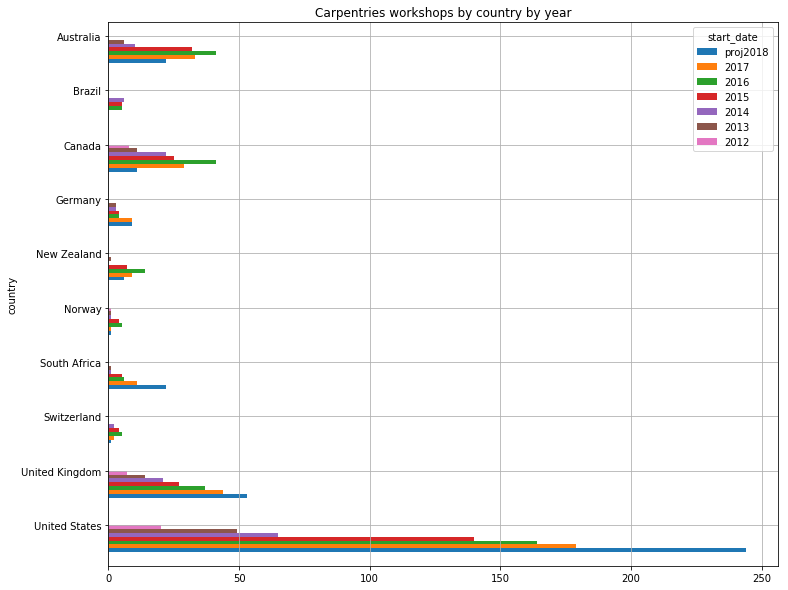

In [10]:
# Draw bar chart showing most active countries and workshops by year# Draw b 

workshops_by_country_year_top = workshops_by_country_year_top[::-1]
workshops_by_country_year_top = workshops_by_country_year_top.set_index('country')

fig = plt.figure(figsize=(12, 10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries workshops by country by year"
workshops_by_country_year_top.plot(y = list(workshops_by_country_year_top)[::-1], kind='barh', ax=ax, position=1, title=title)

ax.grid(True)

plt.show()



In [11]:
### When did each country have its first workshop?

# Data goes back to 2012; 
# some countries may have been holding Carpentries workshops before this time.


w2 = workshops_by_country_year.copy()

# See https://stackoverflow.com/questions/31828240/first-non-null-value-per-row-from-a-list-of-pandas-columns
# and
# https://stackoverflow.com/questions/38467749/find-first-non-zero-value-in-each-row-of-pandas-dataframe

# Fill zero values with Nan to make them non valid values
res = w2[w2 != 0.0]

first_workshop = res.apply(pd.Series.first_valid_index, axis=1)
first_workshop = pd.DataFrame({'year': first_workshop.values.astype(str), 'country': first_workshop.index.values}, index=None)
first_workshop = first_workshop.sort_values('year').set_index('year')
# first_workshop


In [12]:
### How many countries had their first workshop each year?

first_workshop.groupby(level=0).count()


,country
year,
2012,6
2013,9
2014,8
2015,9
2016,5
2017,4
2018Q1,2


### Which countries had their first workshop in 2017?

Four countries, all in Africa, had their first workshop in 2017. This is representative of the significant growth we've seen in this part of the world. (Include information about new workshop administrators and task force in Africa)

In [13]:
first_workshop.loc['2017']


,country
year,
2017,Botswana
2017,Mauritius
2017,Ethiopia
2017,Gabon


## Attendance at workshops

### Workshops missing attendance

After running a workshop, The Carpentries staff asks hosts or instructors to submit attendance data to us.  In some cases, this is detailed account of the number registered and the number attended each day.  In other cases, this is a best estimate by the host or instructors. 

In some cases, the hosts or instructors do not report back on attendance data. From 2012 through 2018 Q1, 122 of 1323 (about 9%) workshops were missing attendance.  While this is not a large percentage of total workshops, it is indication for The Carpentries to understand why attendance data may not have been shared. It could be because the hosts or instructors were uncomfortable sharing low numbers, because the hosts or instructors didn't have clear systems to collect and share attendance numbers, or other reaons.  The Carpentries should better understand these reasons in order to address them.

For the analyses below, workshops missing attendance are excluded from the analyses. Because low attendance is a possible factor in not having reported attendance, replacing missing attendance data with means would not be an accurate reflection of our numbers.

In [14]:
# This is a full list of all workshops that did not report attendance 
# back to the Carpentries.  Reasons for this may vary and demonstrate a 
# need for Carpentries staff, workshop hosts, and instructors to better 
# collect and record this data.


# Not sure why this way gives a warning
# missing_attendance = workshops_nonTTT[pd.isnull(workshops['attendance'])]

# This way does not give warning
missing_attendance = workshops[workshops.attendance.isnull()]

# missing_attendance
# Uncomment the above line to see a list of workshops missing attendance

In [15]:
# Calculate projected attendance for 2018

# Total attendance for 2017
total2017 = workshops_2017['attendance'].sum(skipna=True)

# Total attendance for 2017 Q1
total2017Q1 = workshops_2017Q1['attendance'].sum(skipna=True)


# Total attendance for 2018 Q1
total2018Q1 = workshops_2018Q1['attendance'].sum(skipna=True)


proportion_attendance_2017Q1 = total2017Q1/total2017

projected_attendance_2018 = total2018Q1/proportion_attendance_2017Q1

### Total attendance by year: Table view

This table and chart show the total number of learners at Carpentries workshops each year.  
Based on the number of learners in the first quarter of 2017, we anticipate a drop in the number of learners we will see in 2018. This may be connected to class sizes getting smaller. While we anticipate running more workshops in 2018, we may see a trend towards smaller, more intimate settings.

In [16]:
attendance = workshops_nonTTT[['start_date', 'attendance']]   #df['date'].dt.year
attendance = attendance.assign(year=attendance['start_date'].dt.year)

# Doing the above like this gives a SettingWithCopyWarning error
# attendance['year'] = attendance['start_date'].dt.year
# See https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
total_attendance_by_year = attendance.groupby('year')['attendance'].sum()
total_attendance_by_year = total_attendance_by_year.to_frame()

total_attendance_by_year.loc['2018proj'] = [projected_attendance_2018]
total_attendance_by_year = total_attendance_by_year.astype(int)
total_attendance_by_year = total_attendance_by_year.drop([2018])
total_attendance_by_year


,attendance
year,
2012,1378
2013,3212
2014,4742
2015,7755
2016,7110
2017,7217
2018proj,6289


### Total attendance by year: Chart view

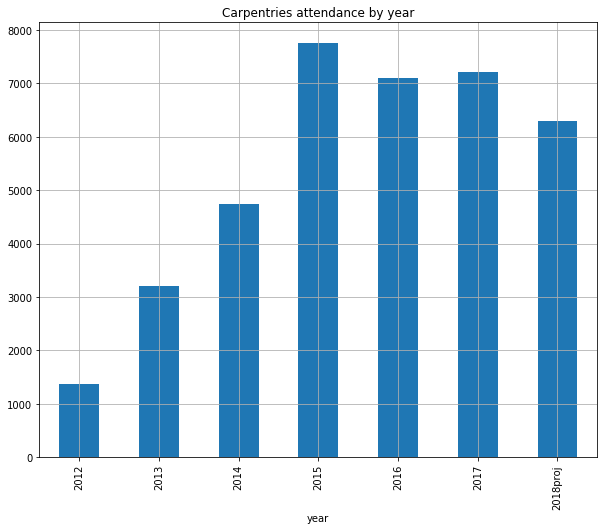

In [17]:
fig = plt.figure(figsize=(10, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries attendance by year"
total_attendance_by_year.plot(kind='bar', ax=ax, title=title, legend=False)

ax.grid(True)

plt.show()


### Box plot showing frequency of class sizes

This box plot shows the range of our class sizes, and demonstrates a trend towards smaller classes in the past few years, with 2018 workshops showing a slight increase. The center line represents the median and the red dot represents the mean.  In this case, 2018 data is not a projection but rather actual data from 2018 Q1.


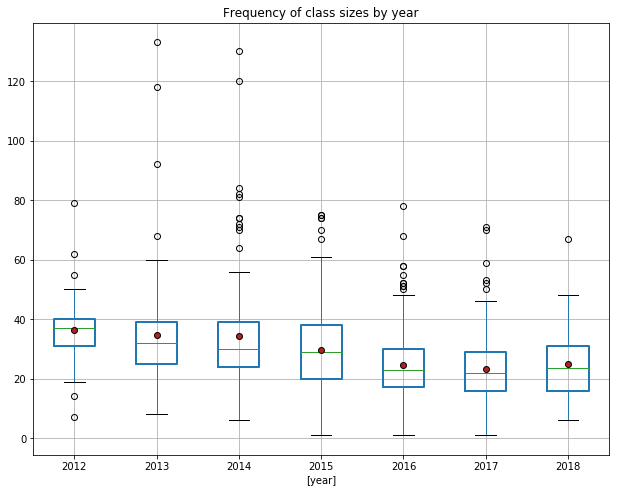

In [18]:
# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html

title = "Frequency of class sizes by year"

has_attendance = attendance[pd.notnull(attendance['attendance'])]

meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='firebrick')
boxprops = dict(linestyle='-', linewidth=2, color='k')

ax = has_attendance.boxplot(by="year", figsize=(10,8), showmeans = True, meanprops = meanprops, boxprops = boxprops)
ax.set_title(title)
ax.get_figure().suptitle("")
plt.show()


### Binned attendance by year

This table shows by year, how many workshops had 1-10 learners, 11-20 learners, and so on.  

In [19]:
bins = pd.cut(attendance['attendance'], [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf])
attendance.groupby(bins)['attendance'].agg(['count'])

binned_attendance_by_year = attendance.groupby([ bins, 'year'])['attendance'].agg(['count'])

binned_attendance_by_year =  binned_attendance_by_year.unstack()
binned_attendance_by_year['total'] = binned_attendance_by_year.sum(axis=1)
binned_attendance_by_year = binned_attendance_by_year.rename(index=str, columns={2018:"2018Q1"})

binned_attendance_by_year = binned_attendance_by_year.fillna(0).astype(int)
binned_attendance_by_year

count                                 total
year        2012 2013 2014 2015 2016 2017 2018Q1      
attendance                                            
(1, 10]        1    2    2   16   23   23      6    73
(10, 20]       3   12   23   50   85  112     21   306
(20, 30]       5   25   46   83  111  109     23   402
(30, 40]      20   37   41   69   52   51     15   285
(40, 50]       6   10   11   29    9    9      4    78
(50, 60]       1    3    4    7    7    3      0    25
(60, 70]       1    1    2    3    1    1      1    10
(70, 80]       1    0    4    4    1    1      0    11
(80, 90]       0    0    3    0    0    0      0     3
(90, 100]      0    1    0    0    0    0      0     1
(100, inf]     0    2    2    0    0    0      0     4

## Instructor Training

This tables lists all instructor training events the Carpentries has held since 2012. The "count_badged" column is a total of all individuals from that event with at least one badge.  We are not distinguishing between Software Carpentry and Data Carpentry badges.

In [20]:
badges_by_training_event = pd.read_csv("data_files/badges_by_training_event.csv")

badges_by_training_event['pct_completion'] = badges_by_training_event['count_badged'] / badges_by_training_event['attendance'] * 100
badges_by_training_event = badges_by_training_event.round({'pct_completion':1})
badges_by_training_event['start'] = pd.to_datetime(badges_by_training_event['start'])


badges_by_training_event['country'] = badges_by_training_event['country'].apply(get_country_name)

badges_by_training_event

,slug,start,country,attendance,count_badged,pct_completion
0,2012-08-26-ttt-online,2012-08-26,online,20,17,85.0
1,2012-10-11-ttt-online,2012-10-11,online,25,19,76.0
2,2013-01-06-ttt-online,2013-01-06,online,12,5,41.7
3,2013-03-12-ttt-online,2013-03-12,online,27,18,66.7
4,2013-05-12-ttt-online,2013-05-12,online,45,18,40.0
5,2013-08-12-ttt-online,2013-08-12,online,41,24,58.5
6,2013-09-30-ttt-online,2013-09-30,online,57,22,38.6
7,2014-01-16-ttt-online,2014-01-16,online,67,25,37.3
8,2014-04-14-ttt-pycon,2014-04-14,online,34,3,8.8
9,2014-04-24-ttt-online,2014-04-24,online,58,24,41.4


### Number of instructor training events by country

This table shows how many training events took place in each country.  Inperson events are noted as taking place in a specific country. All online events are noted as online, even if the trainees came entirely from one country. 

In [21]:
trainigs_by_country = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['slug'].count().unstack()
trainigs_by_country['total'] = trainigs_by_country.sum(axis=1)
trainigs_by_country.index.values
trainigs_by_country = trainigs_by_country.rename(index = {2018:'2018Q1'})
trainigs_by_country

country,Australia,Canada,Netherlands,New Zealand,Norway,Poland,Puerto Rico,South Africa,Switzerland,United Kingdom,United States,online,total
start,,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0
2015,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,3.0,12.0,21.0
2016,2.0,1.0,NaN,3.0,1.0,NaN,NaN,1.0,1.0,3.0,12.0,11.0,35.0
2017,3.0,1.0,1.0,1.0,NaN,NaN,1.0,2.0,NaN,4.0,14.0,21.0,48.0
2018Q1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,8.0,14.0


### Binned completion rates for instructor training events by year

This shows the count of events by completion rates.  For example, six events in 2016 had a completion rate under 25%.  The counts are binned by quartiles, separating out events with 100% completion rates (two events total).

In [22]:
bins = pd.cut(badges_by_training_event['pct_completion'], [0, 25, 50, 75, 99, 100])
binned_badges_by_year = badges_by_training_event.groupby([ bins, badges_by_training_event['start'].dt.year])['pct_completion'].agg(['count'])

binned_badges_by_year =  binned_badges_by_year.unstack()
binned_badges_by_year['total'] = binned_badges_by_year.sum(axis=1)

binned_badges_by_year


count                                 total
start           2012 2013 2014 2015  2016  2017 2018      
pct_completion                                            
(0, 25]          NaN  NaN  2.0  1.0   6.0   4.0  6.0  19.0
(25, 50]         NaN  3.0  5.0  8.0  18.0  18.0  5.0  57.0
(50, 75]         NaN  2.0  3.0  8.0   8.0  22.0  2.0  45.0
(75, 99]         2.0  NaN  NaN  3.0   3.0   3.0  1.0  12.0
(99, 100]        NaN  NaN  NaN  1.0   NaN   1.0  NaN   2.0

### Attendance and number badged by year

#### Total attendance by year

This table shows the total number of trainees at instructor training events each year by country.

In [23]:
attendance_by_year = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['attendance'].sum().unstack()
attendance_by_year

# trainigs_by_country = badges_by_training_event.groupby([badges_by_training_event['start_date'].dt.year, 'country'])['slug'].count().unstack()


country,Australia,Canada,Netherlands,New Zealand,Norway,Poland,Puerto Rico,South Africa,Switzerland,United Kingdom,United States,online
start,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0
2015,NaN,22.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,75.0,76.0,393.0
2016,52.0,27.0,NaN,41.0,22.0,NaN,NaN,23.0,20.0,62.0,211.0,206.0
2017,57.0,23.0,16.0,28.0,NaN,NaN,12.0,62.0,NaN,83.0,194.0,359.0
2018,4.0,10.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,56.0,135.0


#### Total badged by year

This table shows the total number of trainees who were awarded badges at instructor training events each year by country.

In [24]:
badges_by_year = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['count_badged'].sum().unstack()
badges_by_year


country,Australia,Canada,Netherlands,New Zealand,Norway,Poland,Puerto Rico,South Africa,Switzerland,United Kingdom,United States,online
start,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0
2015,NaN,16.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,35.0,34.0,249.0
2016,28.0,21.0,NaN,22.0,10.0,NaN,NaN,11.0,17.0,22.0,92.0,92.0
2017,29.0,10.0,6.0,14.0,NaN,NaN,2.0,24.0,NaN,47.0,111.0,192.0
2018,1.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,8.0,54.0


#### Percent of trainees badged per year
This is calculated from the above two tables. Note the country data shows the country the event was held in, not the country the trainee is based in.  The year is the year the event was held, not the year the badge was issued.

In [25]:
percent_badged_by_year = badges_by_year/attendance_by_year*100
percent_badged_by_year = percent_badged_by_year.round(1)
percent_badged_by_year

country,Australia,Canada,Netherlands,New Zealand,Norway,Poland,Puerto Rico,South Africa,Switzerland,United Kingdom,United States,online
start,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6
2015,NaN,72.7,NaN,NaN,NaN,23.1,NaN,NaN,NaN,46.7,44.7,63.4
2016,53.8,77.8,NaN,53.7,45.5,NaN,NaN,47.8,85.0,35.5,43.6,44.7
2017,50.9,43.5,37.5,50.0,NaN,NaN,16.7,38.7,NaN,56.6,57.2,53.5
2018,25.0,10.0,NaN,NaN,NaN,NaN,NaN,52.9,NaN,NaN,14.3,40.0


### Comparison:  Inperson vs Online Training Events

The table and char below show the number of training events we have held each year, separated by online and inperson events.  

#### Number of events per year

In [26]:
countries = list(trainigs_by_country)
countries.remove('online')
countries.remove('total')
inperson_trainings = trainigs_by_country[countries].sum(axis = 1).to_frame()

online_trainings = trainigs_by_country[['online']]

trainings_online_inperson = pd.concat([inperson_trainings, online_trainings], axis=1)

trainings_online_inperson.rename(columns = {0:'in-person'}, inplace=True)

trainings_online_inperson


,in-person,online
start,,
2012,NaN,2.0
2013,NaN,5.0
2014,NaN,10.0
2015,9.0,12.0
2016,24.0,11.0
2017,27.0,21.0
2018Q1,6.0,8.0


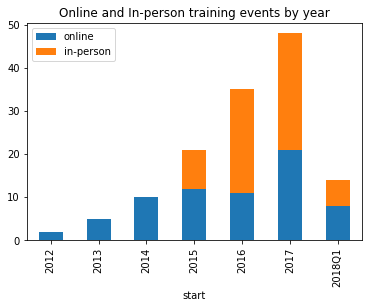

In [27]:
title = "Online and In-person training events by year"
trainings_online_inperson[['online','in-person']].plot(kind='bar', stacked=True, title=title)